# References 
1. Liu, XS. (2013) *Statistical Power Analysis for the Social and Behavorial Science: Basic and Advanced Techniques*. New York: Routledge. 364. [via UCSD](http://roger.ucsd.edu/search~S9?/Xstatistical%20power&=&Da=&Db=&searchscope=9&p=&SORT=D/Xstatistical%20power&=&Da=&Db=&searchscope=9&p=&SORT=D&SUBKEY=statistical+power/1%2C861%2C861%2CE/frameset&FF=Xstatistical%20power&=&Da=&Db=&searchscope=9&p=&SORT=D&1%2C1%2C)

**Author**: J W Debelius<br/>
**Date**: 22 June 2015<br/>
**virtualenv**: power play

In [2]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

# Introduction

...

## Emperical Power
...

In [24]:
from __future__ import division
import numpy as np
from skbio.stats.power import subsample_power
from statsmodels.stats.power import FTestAnovaPower, TTestIndPower
ft = FTestAnovaPower()
tt = TTestIndPower()

def calculate_emperical_power(distributions, power_prediction, counts, alpha=0.05):
    """Calculates the statistical power for the emerpical, monte carlo"""
    # Calculates the effect size 
    
    # Calculates the staticial power for the F test
    f_pwr = np.array([ft.solve_power(eff_size, nobs=c, alpha=alpha, power=None) for c in counts])
    # Calculates the statical power for the T test
    t_pwr = np.array([tt.solve_power(eff_size, nobs1=c, alpha=alpha, power=None) for c in counts])

## Comparison Methods
We'll use Monte Carlo simulations, and look at the difference between the traditional power estimate and the power estimate. We' n

In [ ]:
num_simulations = 100


* Case I t test
* Case II t test
* Pearsons R
* ANOVA
* Permanova (Bittinger's paper)
* Binomial Distribution
* Simple linear regression

# Z test
A [Z test](https://en.wikipedia.org/wiki/Z-test) is a measure of a normal distribution. The test statistic, *z* is calculated as 

In [102]:
import scipy
import scipy.stats as stats

def calculate_z_power(mu1, mu2, sigma, counts, alpha=0.05):
    """Calculates power for the z test"""
    
    # Calculates the effect size
    eff = np.absolute(mu1 - mu2) / sigma * np.sqrt(counts)
    # Calculates the z score
    z_alpha = scipy.stats.norm.ppf(1 - alpha/2, 0, 1)
    # Gets the power
    return scipy.stats.norm.cdf(-z_alpha + eff, 0, 1)

In [101]:
def get_vitals(samp):
    """..."""
    return samp.mean(), samp.std(), len(samp)

def var_pooled_ubiased(sigma, nobs):
    """..."""
    sigma_sq = np.array([(n - 1)*np.square(s) for s, n in zip(*[sigma, nobs])]).sum() / nobs.sum()
    return np.sqrt(sigma_sq)

# Defines the the test for the z test
def z_test(samples):
    """Calculates a z test, using two input samples"""
    samp1, samp2 = samples
    # Gets key information about the distributions
    [mu1, sigma1, n1] = get_vitals(samp1)
    [mu2, sigma2, n2] = get_vitals(samp2)
    
    # Calculates the pooled varaince
    sigma_pool = var_pooled_ubiased(np.array([sigma1, sigma2]), np.array([n1, n2]))
    n_pool = (n1 + n2)/n1/n2
    
    # Calculates the test statistic
    test = (mu1 - mu2) / sigma_pool / np.sqrt(n_pool)
    
    # Gets the signifigance on the test statistic
    p = scipy.stats.norm.pdf(test, 0, 1)
    
    return p
#     

To test power, we'll draw two random samples of 1000 observations. 

In [143]:
sample_counts = np.arange(2, 50, 2)
# ...
# for i in xrange(num_iterations):
stop = False
while not stop:

    # # Draws the two means and varaince
    mean1 = np.random.randint(10)
    mean2 = np.random.randint(10)
    sigma = np.random.randint(25)

    # # Draws the two samples
    samp1 = sigma * np.random.randn(100) + mean1
    samp2 = sigma * np.random.randn(100) + mean2

    # Characterizes the two calculations
    [xbar1, s1, n1] = get_vitals(samp1)
    [xbar2, s2, n2] = get_vitals(samp2)

    if z_test([samp1, samp2]) < 0.01:
        # Calculates traditional power for the two samples
        trad_pwr = calculate_z_power(xbar1, xbar2, sigma, sample_counts)

        # Calculate emperical power for those samples
        pwr, cnts = subsample_power(z_test, [samp1, samp2], min_counts=2, counts_interval=2, max_counts=50)

        stop=True

In [145]:
print trad_pwr
print pwr.mean(0)

[ 0.09915144  0.15687054  0.21379571  0.26999123  0.3249745   0.37824998
  0.42940632  0.47813205  0.52420998  0.56750548  0.60795354  0.64554635
  0.68032192  0.7123541   0.74174397  0.76861245  0.79309414  0.81533219
  0.83547414  0.85366855  0.87006235  0.8847988   0.89801591  0.90984539]
[ 0.4472  0.2544  0.2148  0.2172  0.2144  0.234   0.2494  0.2664  0.286
  0.2952  0.3188  0.3402  0.357   0.3734  0.4144  0.4264  0.464   0.4798
  0.4894  0.5114  0.5348  0.5654  0.5966  0.6098]


In [136]:
xbar1

0.9718803498007007

In [137]:
xbar2

9.062957316389868

In [140]:
s_pool

212.94217210343328

In [122]:
calculate_z_power(mean1, mean2, sigma, sample_counts)

array([ 0.0566535 ,  0.07670829,  0.09545136,  0.11370823,  0.13174716,
        0.14967575,  0.16753797,  0.18534819,  0.20310572,  0.22080189,
        0.23842377,  0.25595625,  0.27338332,  0.29068881,  0.30785684,
        0.32487214,  0.34172019,  0.35838739,  0.37486106])

In [125]:
calculate_z_power(xbar1, xbar2, s_pool, sample_counts)

array([ 0.0255107 ,  0.02572478,  0.02589007,  0.0260301 ,  0.026154  ,
        0.02626644,  0.02637019,  0.02646707,  0.02655833,  0.02664488,
        0.02672743,  0.0268065 ,  0.02688252,  0.02695585,  0.02702675,
        0.02709547,  0.02716222,  0.02722717,  0.02729045])

In [130]:
pwr, cnts = subsample_power(z_test, [samp1, samp2], min_counts=5, counts_interval=10, max_counts=50)

In [131]:
pwr.mean(0) 

array([ 0.1546,  0.0974,  0.1192,  0.1246,  0.1284])

ValueError: x and y must have same first dimension

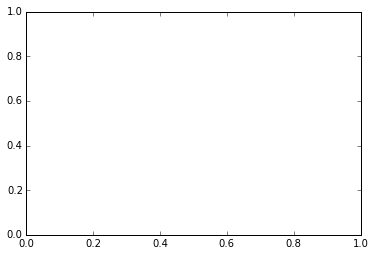

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sample_counts, trad_pwr)

In [85]:
print mean1, mean2, sigma
print pwr, cnts

0 9 4
[[ 0.95   0.99   0.994  1.     1.     1.     1.     1.   ]
 [ 0.95   0.98   0.996  0.998  1.     1.     1.     1.   ]
 [ 0.954  0.982  0.992  1.     1.     1.     1.     1.   ]
 [ 0.952  0.978  0.996  1.     1.     1.     1.     1.   ]
 [ 0.938  0.988  0.996  0.996  1.     1.     1.     1.   ]
 [ 0.954  0.978  0.996  1.     1.     1.     1.     1.   ]
 [ 0.954  0.988  0.998  1.     1.     1.     1.     1.   ]
 [ 0.954  0.99   1.     1.     1.     1.     1.     1.   ]
 [ 0.934  0.978  1.     1.     1.     1.     1.     1.   ]
 [ 0.958  0.982  0.994  0.998  1.     1.     1.     1.   ]] [ 4  6  8 10 12 14 16 18]


In [65]:
[mu1, sigma1, n1] = get_vitals(samp1)
[mu2, sigma2, n2] = get_vitals(samp2)

sigma_pool = var_pooled_ubiased(np.array([sigma1, sigma2]), np.array([n1, n2]))
n_pool = (n1 + n2)/n1/n2

In [56]:
print sigma1, sigma2, sigma_pool

43.5572561407 45.7707668057 44.6553773852


In [62]:
print n1, n2, n_pool

1000 1000 500.0


In [66]:
test = (mu1 - mu2) / sigma_pool / np.sqrt(n_pool)
print test

-12.2148599535


In [73]:
p = scipy.stats.norm.pdf(np.absolute(test), 0, 1)
p

1.5919627572908852e-33

In [ ]:
def calculate_emperical_power(test, distributions, alpha=0.05):
    """Calculates the statistical power for the emerpical, monte carlo"""
    # Calculates the emperical power
    counts, power = subsample_power(test, distributions, alpha_pwr=alpha)
    # Gets the emperical effect size

    
    # Calculates the staticial power for the F test
    f_pwr = np.array([ft.solve_power(eff_size, nobs=c, alpha=alpha, power=None) for c in counts])
    # Calculates the statical power for the T test
    t_pwr = np.array([tt.solve_power(eff_size, nobs1=c, alpha=alpha, power=None) for c in counts])

In [30]:
help(subsample_power)

Help on function subsample_power in module skbio.stats.power:

subsample_power(test, samples, draw_mode='ind', alpha_pwr=0.05, ratio=None, max_counts=50, counts_interval=10, min_counts=None, num_iter=500, num_runs=10)
    Subsamples data to iteratively calculate power
    
    Parameters
    ----------
    test : function
        The statistical test which accepts a list of arrays of values
        (sample ids or numeric values) and returns a p value or one-dimensional
        array of p values.
    samples : array_like
        `samples` can be a list of lists or a list of arrays where each
        sublist or row in the array corresponds to a sampled group.
    draw_mode : {"ind", "matched"}, optional
        "matched" samples should be used when observations in
        samples have corresponding observations in other groups. For instance,
        this may be useful when working with regression data where
        :math:`x_{1}, x_{2}, ..., x_{n}` maps to
        :math:`y_{1}, y_{2}, ...

In [13]:
for i in xrange(10):
    print np.random.randint(100)

71
96
2
23
5
57
66
97
24
5
